Canvas
======



To aid creative applications of machine learning models built in Python, we created a small `Canvas` class that mimics the interface of P5Js by using Python in combination with the Cairo drawing interface.
> **_NOTE:_**  The canvas module is not an extensively tested system. It is intended to facilitate creating images in Python with an interface that is familiar to Processing/P5js users. But you should eventually familiarize yourself with other more widely used drawing API's, such as Matplotlib or pyCairo. In other words, you should consider it a "gateway API" to these more complex systems that you will often encounter when looking at machine learning code available on the web. Don't hesitate to contact Danel if you find any bugs or unexpected behaviors, by email or by posting an "Issue" on github at this [link](https://github.com/colormotor/DMLAP/issues).




## Installation



#### With jupyter/desktop
To use, copy the `canvas.py` file in the same directory as your notebook or Python source files and then make sure you have [pycairo](https://anaconda.org/conda-forge/pycairo) installed. If you use Miniconda/Anaconda, install pycairo from the terminal with:

    conda install -c conda-forge pycairo

#### With Google Collab
When using Google collab you will need to use `pip` and install with (based on [this](https://github.com/pygobject/pycairo/issues/39#issuecomment-391830334))


In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

### Importing 
To test if the installation works, you should be able to use the `Canvas` object by importing the module with

In [39]:
import canvas

## Basic example



Here is a basic working example that initializes a `Canvas` with a given size, creates a black background, draws a circle and then saves and displays the resulting image



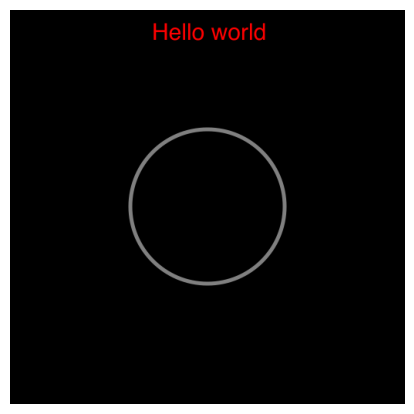

In [40]:
import canvas
import matplotlib.pyplot as plt

# Create our canvas object
c = canvas.Canvas(512, 512)

# Clear background to black
c.background(0)
# Set stroke only and draw circle
c.stroke(128)
c.no_fill()
c.stroke_weight(5)
c.circle([c.width/2, c.height/2], 100)
# Draw red text
c.fill(255, 0, 0)
c.text_size(30)
c.text([c.width/2, 40], "Hello world", center=True)
# Save image
c.save_image('test.png')
c.show()

You will notice that the programming interface is similar to p5js, but does not currently handle animations. The main difference with respect to p5js are:

-   The naming convention usese &ldquo;snake case&rdquo; rather than &ldquo;camel case&rdquo;. That is we use underscores to separate terms rather than capitalization. So e.g. p5js&rsquo; `strokeWeight` becomes `stroke_weight`. This is pretty much a standard in Python code.
-   Positions are passed in as lists or numpy arrays. So for example the `circle` function takes one argument that is a position and a second argument that is the radius. In p5js we would have `circle(x, y, radius)` and here we have `c.circle([x, y], radius)`. This is more convenient since if we use numpy arrays, we can do mathematical operations on vectors instead of having to treat each coordinate separately.
-   Finally, we need to create a `Canvas` object for this system to work, so all the commands that you would usually write in the p5js editor need to have the reference to the canvas object prepended (e.g. `c.stroke(255)` rather than `stroke(255)` for a white stroke). Here we are calling the object `c` for brevity.


## Step by step examples



### Creating and clearing a Canvas



To create a Canvas make sure you import `canvas` and then



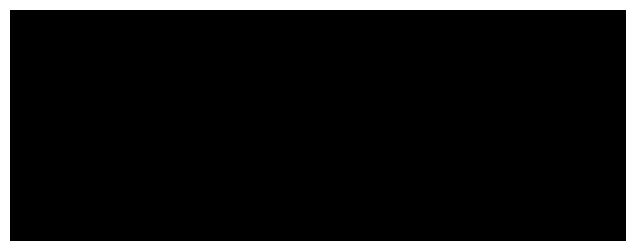

In [41]:
c = canvas.Canvas(800, 300)
c.show()

the `c.show()` method will display the current canvas image in the notebook.

By default the `Canvas` object is cleared to black. We can change this, e.g let&rsquo;s clear to red:



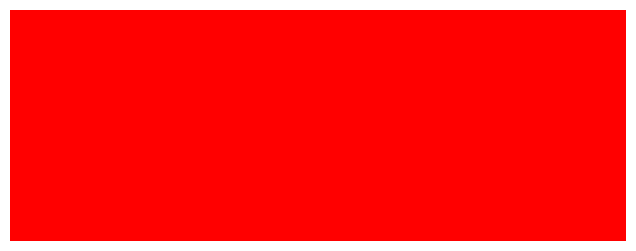

In [42]:
c.background(255, 0, 0)
c.show()

### Drawing text



To draw text use the `text` method. We can change size using `text_size` and optionally set the text to be horizontally centered. The text is colored with the current fill color, which is set with the `fill` function:



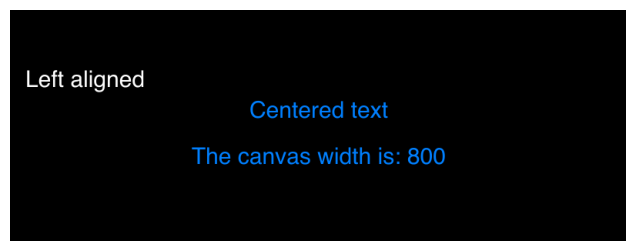

In [43]:
c.background(0)
c.text_size(30)
c.fill(255)
c.text([20, 100], "Left aligned")
c.fill(0, 128, 255)
c.text([c.width/2, 140], "Centered text", center=True)
c.text([c.width/2, 200], f"The canvas width is: {c.width}", center=True) # Using Python formatted strings
c.show()

P.s. note that in Python, `True` and `False` start with a capital!



### Basic shapes



Similarly to p5js we can draw basic shapes such as rectangles and circles. The main difference is that we specify coordinates as either lists or numpy arrays. E.g. for a rectangle we will use:



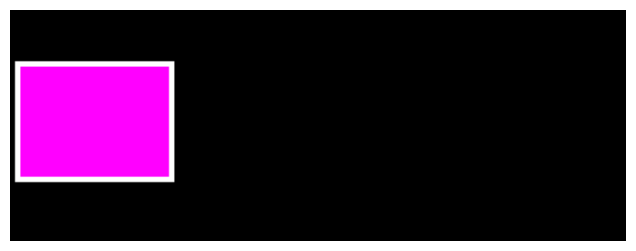

In [44]:
c.background(0)
c.fill(255, 0, 255)
c.stroke(255)
c.stroke_weight(7)
c.rectangle([10, 70], [200, 150])
c.show()

The `rectangle` method has two arguments, the `[x,y]` coordinates of the top left corner and the size `[width, height]` of the rectangle.
Here we first set the fill and stroke color with `fill` and `stroke` and then also the stroke thickness with `stroke_weight`.

Let&rsquo;s add also a blue circle to the canvas



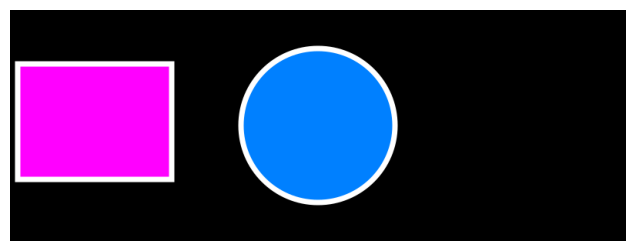

In [45]:
c.fill(0, 128, 255)
c.circle([400, c.height/2], 100)
c.show()

Note that here we did not clear the canvas so we still have the rectangle.



### Color modes



By default the canvas uses RGB colors specified in the range between 0 and 255. We can specify colors as single arguments



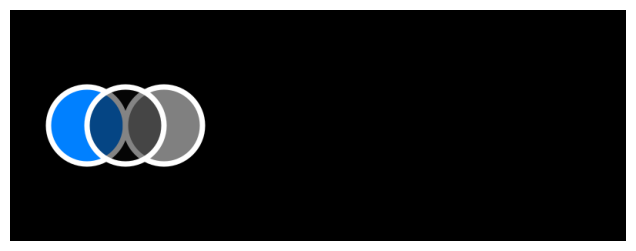

In [46]:
c.background(0)
c.fill(0, 128, 255)
c.circle([100, c.height/2], 50)
c.fill(128) # Only one value is grayscale
c.circle([200, c.height/2], 50)
c.fill(10, 128) # Two values is gray, alpha
c.circle([150, c.height/2], 50)
c.show()

Or we can use arrays/lists, for example here we specify a random RGB color with `np.random.uniform`:



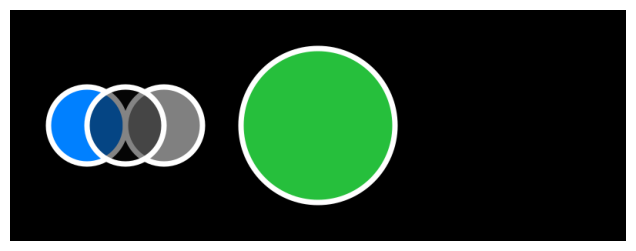

In [47]:
import numpy as np
c.fill(np.random.uniform(0, 255, 3))
c.circle([c.width/2, c.height/2], 100)
c.show()

We can also change &ldquo;color mode&rdquo; and the range of the values. E.g. say we want to draw a series of circles with all the hues. We can set the color mode to hue saturation and brightness (`"hsv"` )
and set the range to be between `0` and `1`:



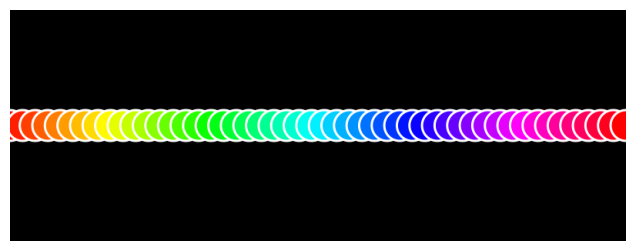

In [48]:
c.background(0)
c.color_mode('hsv', 1.0)
c.stroke(1.0, 0.0, 1.0) # Zero saturation
c.stroke_weight(3)
for hue in np.linspace(0, 1, 50):
    c.fill(hue, 1.0, 1.0)
    c.circle([hue*c.width, c.height/2], 20)
c.show()
# Set color mode back to rgb for the next examples
c.color_mode('rgb', 255)

Here we used the `np.linspace` function to create a sequence of `50` values between `0` and `1`.



### Polygons and polylines



In p5js, to draw a polygon we would write a series of `vertex(x,y)` calls between a `beginShape()` and `endShape()` pairs. Here we will use a list of points or a numpy array to do so. For example to draw a random polyline we can do:



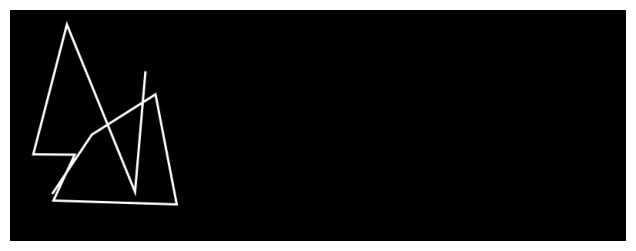

In [49]:
c.background(0)
c.no_fill()
c.stroke(255)
c.polyline(np.random.uniform(0, c.height, (10, 2)))
c.show()

Note that here we specify the &ldquo;shape&rdquo; of the array as 10 rows and 2 columns, meaning that we have 10 points, where each point consists of 2 coordinates (x and y).

Alternatively we can simply specify the coordinates of a polygon with a list. For example to draw a triangle we could do:



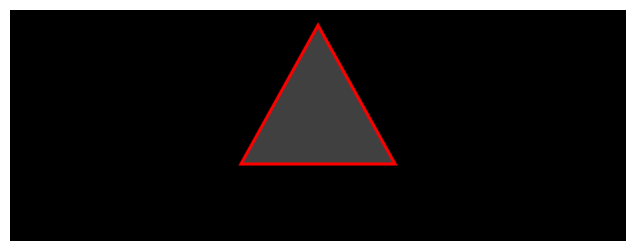

In [50]:
c.background(0)
c.fill(64)
c.stroke(255, 0, 0)
c.stroke_weight(4)
c.polygon( [[400, 20],
            [500, 200],
            [300, 200]] )
c.show()

Here we are using the `polygon` function that produces a closed polygon. Alternatively we can also use `c.polyline(points, closed=True)`.

Now let&rsquo;s draw a series of regular polygons using a Python syntax known as [list comprehensions](https://www.w3schools.com/python/python_lists_comprehension.asp):



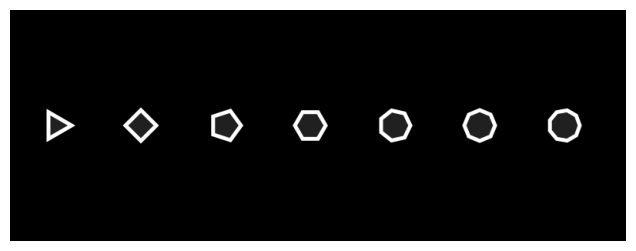

In [51]:
c.background(0)
c.fill(32)
c.stroke(255)
c.stroke_weight(5)
start_sides, end_sides = 3, 10
for sides in range(start_sides, end_sides):
    radius = 30
    x = (c.width - radius) * (sides - start_sides)/(end_sides - start_sides)
    y = c.height/2
    # This creates the coordinates of the polygon
    points = [[np.cos(t*np.pi*2)*20 + x + radius*2,
               np.sin(t*np.pi*2)*20 + y] for t in np.linspace(0, 1, sides+1)]
    c.polygon(points)
c.show()

Here we could have filled the points with a loop of the type:



In [52]:
points = []
for t in np.linspace(0, 1, sides+1):
    points.append([np.cos(t*np.pi*2)*20 + x + radius*2,
                   np.sin(t*np.pi*2)*20 + y])

The above is equivalent but more concise.



### Shapes with holes



We can draw shapes with holes by using combining different shapes betwen a `begin_shape()` and an `end_shape()` pair. For example here we &ldquo;dig&rdquo; a circular hole into a rectangle.



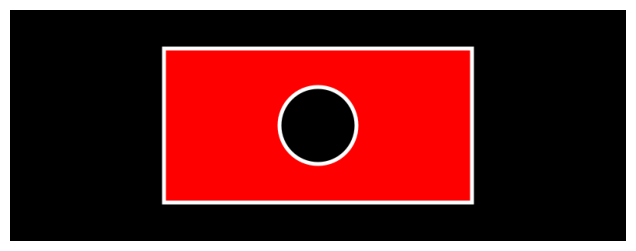

In [53]:
c.background(0)
c.fill(255, 0, 0)
c.stroke(255)
c.begin_shape()
c.rectangle([200, 50], [400, 200])
c.circle([c.width/2, c.height/2], 50)
c.end_shape()
c.show()

Holes will be computed according to the [&ldquo;even odd&rdquo; fill rule](https://en.wikipedia.org/wiki/Even–odd_rule).



### Images



The canvas object allows to display images encoded as numpy arrays. For example, we could create a grayscale image
with random values between 0 and 1 and then display it with:



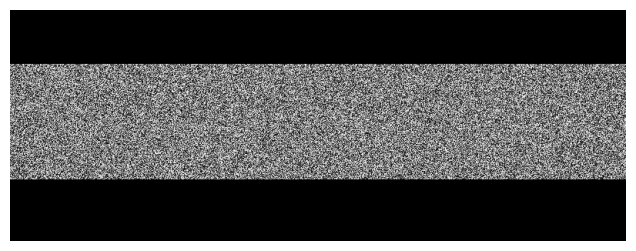

In [54]:
c.background(0)
im = np.random.uniform(0, 1, (150, c.width))
c.image(im, [0, 70])
c.show()

Note that size (the `.shape` property) in numpy arrays is specified as `(rows, columns)` so we specify the size of the array as `(height, width)`. The second argument to the `c.image` method is the position of the top left corner of the image.



#### Loading images



There are many ways to load an image from disk as a numpy array. Here we will use the [Pillow](https://pypi.org/project/Pillow/) library which can be accessed with the `PIL` module:



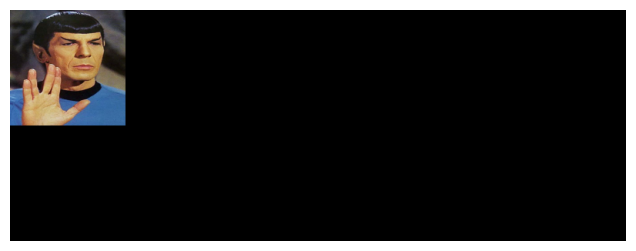

In [55]:
from PIL import Image
c.background(0)
im = np.array(Image.open('images/spock.jpg'))
c.image(im, [0, 0], [150, 150])
c.show()

Here we also specify the size with a third argument `(width, height)`. In this case the image will be in rgb format and have shape:



In [56]:
im.shape

(688, 500, 3)

And it will have a `np.uint8` data type:



In [57]:
im.dtype

dtype('uint8')

Because the result is a numpy array, we can easily do mathematical operations on it. To do so it is convenient to convert the array to floating point by scaling it to the 0 to 1 range:



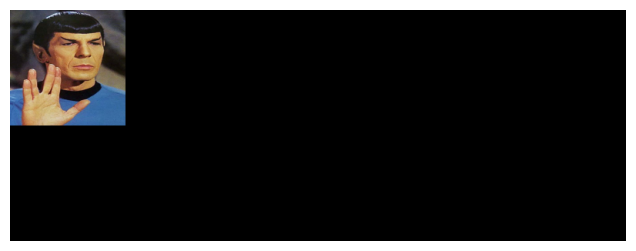

In [58]:
im = im/255
c.background(0)
c.image(im, [0, 0], [150, 150])
c.show()

Even though we scaled the image, we can render it identically. Internally the Canvas object will check the `dtype` property of the array and expect values between 0 and 255 if `dtype` is `np.uint8` and values between 0 and 1 otherwise. The `[0,1]` range is convenient for certain operations, for example we may raise the image to a power or take it&rsquo;s cosine (whatever meaning this may have):



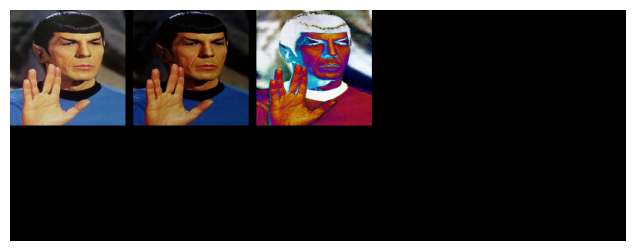

In [59]:
c.image(im**2, [160, 0], [150, 150])
c.image(np.cos(im*np.pi*2)*0.5 + 0.5, [320, 0], [150, 150])
c.show()

We can also scale each RGB channel separately with a multiplication, for example:



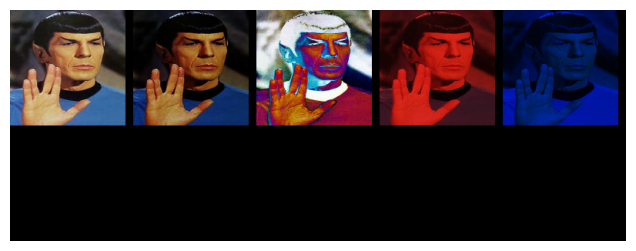

In [60]:
c.image(im*[1.0, 0.2, 0.2], [480, 0], [150, 150])
c.image(im*[0.0, 0.2, 1.0], [640, 0], [150, 150])
c.show()

## Recap



Here is a canvas example with some of the functionalities discussed above:



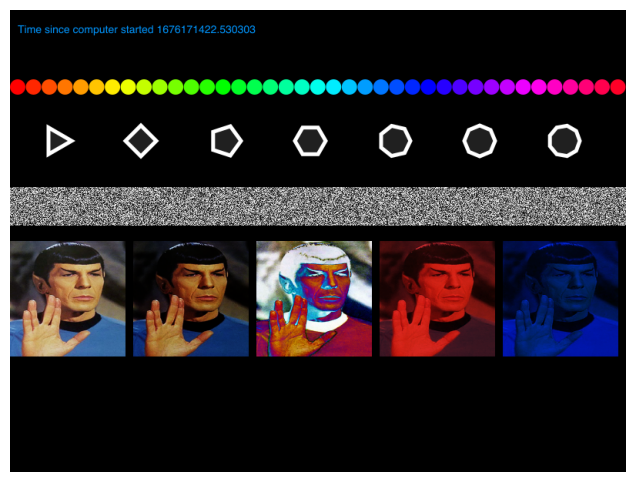

In [61]:
import time
import numpy as np
from PIL import Image

c = canvas.Canvas(800, 600)
c.text_size(14)
c.fill(0, 150, 255)
# A formmatted string example
c.text([10, 30], f"Time since computer started {time.time()}")
# Some colored squares using np.linspace for a loop
# Set color mode to hue-saturation-brightness with a scale of 1
c.color_mode('hsv', 1.0)
c.no_stroke()
for t in np.linspace(0, 1, 40):
    c.fill(t, 1.0, 1.0)
    c.circle([t*c.width+10, 100], 10)
# Go back to rgb with scale of 255
c.color_mode('rgb', 255)
# Draw a series of closed regular polygons with increasing number of sides
c.fill(32)
c.stroke(255)
c.stroke_weight(5)
start_sides, end_sides = 3, 10
for sides in range(start_sides, end_sides):
    radius = 30
    x = (c.width - radius) * (sides - start_sides)/(end_sides - start_sides)
    y = 170
    # This creates the coordinates of the polygon
    points = [[np.cos(t*np.pi*2)*20 + x + radius*2,
                np.sin(t*np.pi*2)*20 + y] for t in np.linspace(0, 1, sides+1)]
    c.polygon(points)
# Create a numpy array with random values between 0 and 1 and treat it as an image
# Note that size is specified as rows, columns (height, width)
im = np.random.uniform(0, 1, (50, c.width))
c.image(im, [0, 230])
# We can also load an image. Here we use PIL, but there are many other methods
im = np.array(Image.open('images/spock.jpg'))
c.image(im, [0, 300], [150, 150])
# Because the image is a numpy array we can perform operations on it
# The Canvas object will also work with images that are in the [0,1] range,
# rather than [0, 255] range. This will make performing math on the pixels easier
im = im/255
c.image(im**2, [160, 300], [150, 150])
c.image(np.cos(im*np.pi*2)*0.5 + 0.5, [320, 300], [150, 150])
# Here we muliply each channel (RGB) by a value
c.image(im*[1.0, 0.2, 0.2], [480, 300], [150, 150])
c.image(im*[0.0, 0.2, 1.0], [640, 300], [150, 150])
# We can draw holes by combining draw calls
c.show()